
The aim of the experiment is to study the DNA in human and chimpanzees and classify the seven different types of proteins that are common in both humans and chimpanzees using the protein sequence data.

##### some protienes

'G protein coupled receptors',
'Tyrosine Kinase',
'Tyrosine phosphatase',
'Synthetase',
'Synthase',
'Ion channel',
'Transcription Factor'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns
from matplotlib import cm 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#### Exploratory Data Analysis

In [4]:
labels = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

In [6]:
human_data = pd.read_table(r"C:\Users\range\Downloads\DNA+Classification\DNA Classification\human_data.txt")
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [7]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [8]:

human_data.describe()

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


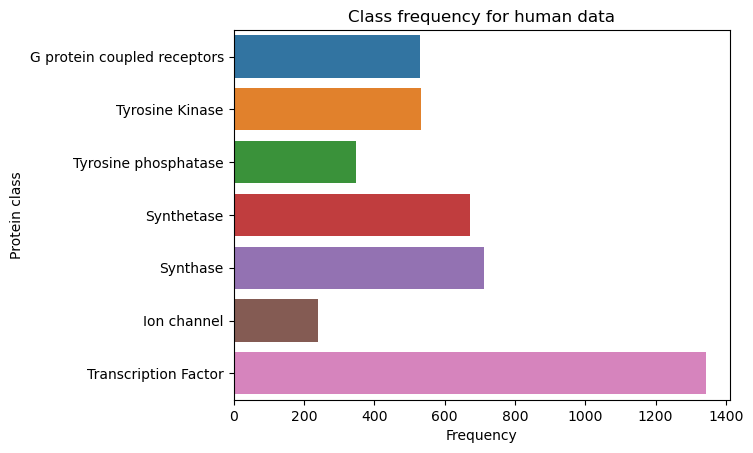

In [9]:
sns.barplot(x=human_data["class"].value_counts().sort_index(),y=labels) #plotting the barplot using seaborn 
plt.title("Class frequency for human data")
plt.xlabel('Frequency')
plt.ylabel('Protein class')
plt.show()

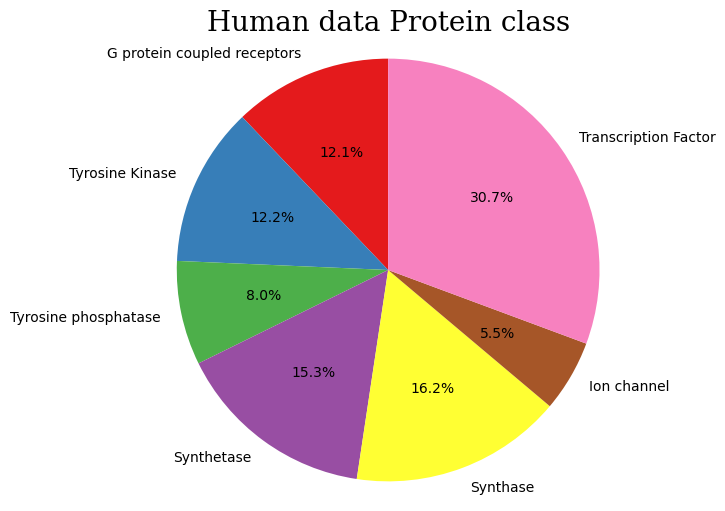

In [10]:
plt.figure(figsize=(6,6))
font_dict=font = {'family': 'serif', 
        'color':  'Black',
        'weight': 'normal',
        'size': 20,
        }
a=np.random.random(7)
cs=cm.Set1(np.arange(7)/7.)
plt.pie(human_data["class"].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90) 
plt.axis('equal')
plt.title("Human data Protein class",fontdict=font_dict) 
plt.show() #displaying the plot

In [31]:
chimp_data = pd.read_table(r"C:\Users\range\Downloads\DNA+Classification\DNA Classification\chimp_data.txt") 
chimp_data.head() 

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [32]:
chimp_data.describe() 

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


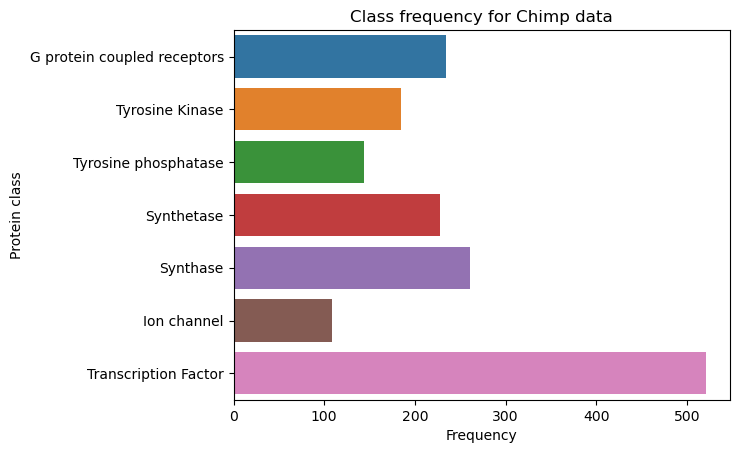

In [13]:
sns.barplot(x=chimp_data["class"].value_counts().sort_index(),y=labels) #plotting the barplot using seaborn
plt.title("Class frequency for Chimp data")
plt.xlabel('Frequency')
plt.ylabel('Protein class')
plt.show()

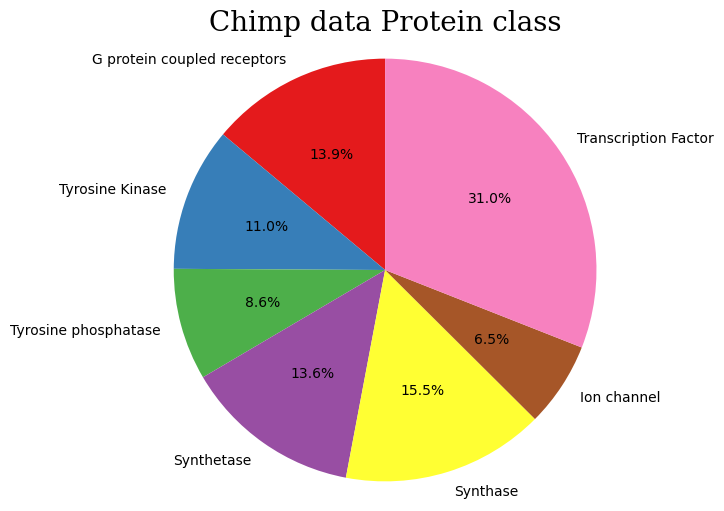

In [14]:
plt.figure(figsize=(6,6)) 
font_dict=font = {'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 20,
        }
a=np.random.random(7) 
cs=cm.Set1(np.arange(7)/7.) 
plt.pie(chimp_data["class"].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90)
plt.axis('equal') 
plt.title("Chimp data Protein class",fontdict=font_dict) 
plt.show() 

##### Model Development 



  ######                      Human Data 

In [15]:

def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]


cv = CountVectorizer(ngram_range=(4,4))


In [16]:

human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1) 

In [17]:
human_texts = list(human_data["words"]) 
for item in range (len(human_data)):
    human_texts[item]=" ".join(human_texts[item])

In [18]:
X_human = cv.fit_transform(human_texts) 
y_human = human_data.iloc[:, 0].values  

In [19]:
print(X_human.shape,y_human.shape) 

(4380, 232414) (4380,)


In [20]:
(human_texts[1])

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [21]:
from sklearn.model_selection import train_test_split
X_train_human, X_test_human, y_train_human, y_test_human = train_test_split(X_human,y_human,test_size = 0.25,random_state=42)


In [22]:
from sklearn.tree import DecisionTreeClassifier 
dtree_human = DecisionTreeClassifier() 
dtree_human.fit(X_train_human,y_train_human)
dtree_human_pred = dtree_human.predict(X_test_human) 
print("Accuracy for human data using  DecisionTree Classifier : ",accuracy_score(dtree_human_pred,y_test_human)) 

Accuracy for human data using  DecisionTree Classifier :  0.806392694063927


In [23]:
from sklearn.ensemble import RandomForestClassifier 
rf_human = RandomForestClassifier(n_estimators=400)
rf_human.fit(X_train_human,y_train_human)
rf_human_pred = rf_human.predict(X_test_human)
print("Accuracy for human data using RandomForest Classifier : ",accuracy_score(rf_human_pred,y_test_human)) 

Accuracy for human data using RandomForest Classifier :  0.919634703196347


In [24]:
import xgboost as xgb 
xgb_human = xgb.XGBClassifier()  
xgb_human.fit(X_train_human,y_train_human) 
xgb_human_pred = xgb_human.predict(X_test_human)  
print("Accuracy for human data using XGBoost Classifier : ",accuracy_score(xgb_human_pred,y_test_human))

Accuracy for human data using XGBoost Classifier :  0.8986301369863013


In [25]:
from sklearn.naive_bayes import MultinomialNB 
NB_human = MultinomialNB(alpha=0.1) 
NB_human.fit(X_train_human,y_train_human) 
y_pred_human = NB_human.predict(X_test_human)  
nb_accuracy_human = accuracy_score(y_pred_human,y_test_human)
print("Accuracy for human data using Naive Bayes Classifier : " ,nb_accuracy_human) 

Accuracy for human data using Naive Bayes Classifier :  0.9780821917808219


<Axes: >

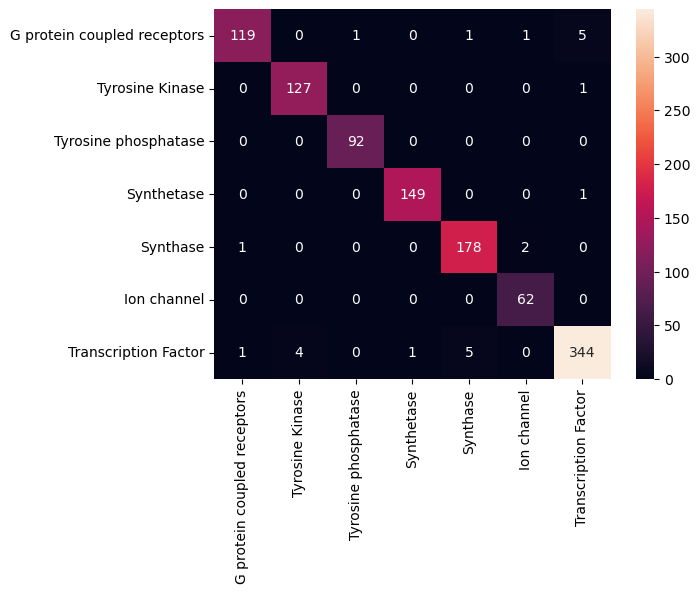

In [26]:
cm =confusion_matrix(y_pred_human,y_test_human)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='g')

In [27]:
print(classification_report(y_pred_human,y_test_human))  


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       127
           1       0.97      0.99      0.98       128
           2       0.99      1.00      0.99        92
           3       0.99      0.99      0.99       150
           4       0.97      0.98      0.98       181
           5       0.95      1.00      0.98        62
           6       0.98      0.97      0.97       355

    accuracy                           0.98      1095
   macro avg       0.98      0.98      0.98      1095
weighted avg       0.98      0.98      0.98      1095



##### Chimpanzee Data

In [33]:
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1) #applying getKmers
chimp_data = chimp_data.drop('sequence', axis=1) 

In [34]:
chimp_texts = list(chimp_data['words']) #creating a list of words column in chimp_data
for item in range(len(chimp_texts)): 
    chimp_texts[item] = ' '.join(chimp_texts[item]) 

In [35]:
(chimp_texts[1])

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattcg attcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggct aggctt ggctta gcttac cttacc ttaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtacta tactaa actaat ctaatc taatca aatcat atcatt tcattc cattct attcta ttctat tctatt ctattc tattcc attccc ttcccc tccccc cccccc ccccct cccctc ccctct cctcta ctctac tctact ctactg tactgg actggt ctggtc tggtcc ggtccc gtcccc tcccca ccccac cccact ccactt cacttc acttct cttcta ttctaa tctaaa ctaaac taaaca aaacat aacatc acatct catctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatt taatta aattac attacc ttacca taccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [36]:
X_chimp = cv.transform(chimp_texts) 
y_chimp = chimp_data.iloc[:, 0].values  

In [37]:
print(X_chimp.shape,y_chimp.shape) 

(1682, 232414) (1682,)


In [38]:
from sklearn.model_selection import train_test_split
X_train_chimp, X_test_chimp, y_train_chimp, y_test_chimp = train_test_split(X_chimp,y_chimp,test_size = 0.25,random_state=42)


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree_chimp = DecisionTreeClassifier()
dtree_chimp.fit(X_train_chimp,y_train_chimp)
dtree_chimp_pred = dtree_chimp.predict(X_test_chimp)
print("Accuracy for Chimp data using  DecisionTree Classifier : ",accuracy_score(dtree_chimp_pred,y_test_chimp))

Accuracy for Chimp data using  DecisionTree Classifier :  0.7767220902612827


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_chimp = RandomForestClassifier(n_estimators=400)
rf_chimp.fit(X_train_chimp,y_train_chimp)
rf_chimp_pred = rf_chimp.predict(X_test_chimp)
print("Accuracy for Chimp data using Random Forest Classifier : ",accuracy_score(rf_chimp_pred,y_test_chimp))

Accuracy for Chimp data using Random Forest Classifier :  0.8242280285035629


In [41]:
import xgboost as xgb
xgb_chimp = xgb.XGBClassifier()
xgb_chimp.fit(X_train_chimp,y_train_chimp)
xgb_chimp_pred = xgb_chimp.predict(X_test_chimp)
print("Accuracy for Chimp data using XGBoost Classifier : ",accuracy_score(xgb_chimp_pred,y_test_chimp))

Accuracy for Chimp data using XGBoost Classifier :  0.8574821852731591


In [42]:
NB_chimp = MultinomialNB(alpha=0.1)
NB_chimp.fit(X_train_chimp,y_train_chimp)
y_pred_chimp = NB_chimp.predict(X_test_chimp)
nb_accuracy_chimp = accuracy_score(y_pred_chimp,y_test_chimp)
print("Accuracy for Chimp data using Naive Bayes Classifier : " ,nb_accuracy_chimp)

Accuracy for Chimp data using Naive Bayes Classifier :  0.8978622327790974


<Axes: >

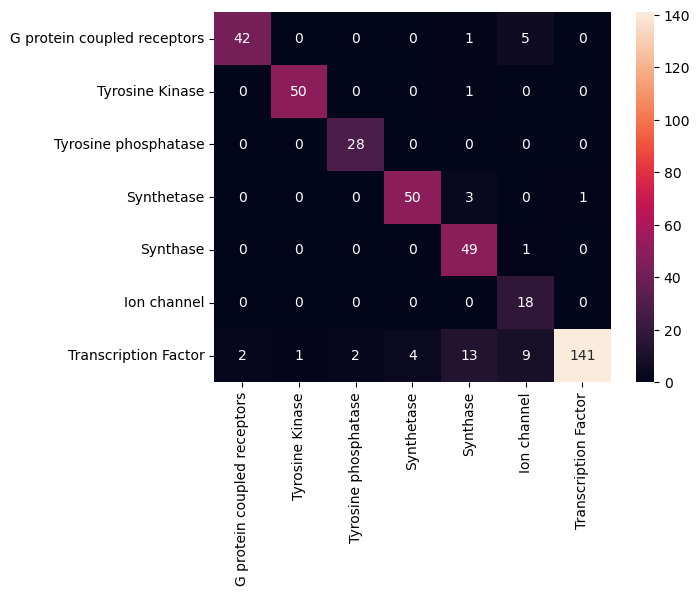

In [43]:

cm =confusion_matrix(y_pred_chimp,y_test_chimp)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt= "g")

In [44]:
print(classification_report(y_pred_chimp,y_test_chimp))  


              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.98      0.98      0.98        51
           2       0.93      1.00      0.97        28
           3       0.93      0.93      0.93        54
           4       0.73      0.98      0.84        50
           5       0.55      1.00      0.71        18
           6       0.99      0.82      0.90       172

    accuracy                           0.90       421
   macro avg       0.87      0.94      0.89       421
weighted avg       0.92      0.90      0.90       421



In [45]:

import pickle
filename = 'human_data_NB1.pkl'
model_pkl = open(filename, 'wb') 
pickle.dump(NB_human, model_pkl)
model_pkl.close()

filename = 'chimp_data_NB1.pkl'
model_pkl = open(filename, 'wb') 
pickle.dump(NB_chimp, model_pkl)
model_pkl.close() 


In [46]:
import pickle
human_pkl=open('human_data_NB1.pkl','rb') 
humanmodel = pickle.load(human_pkl) 

import pickle
chimp_pkl=open('chimp_data_NB1.pkl','rb') 
chimpmodel = pickle.load(chimp_pkl)  